<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Fraud_Review_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os, zipfile
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import folium
from folium import Choropleth
import plotly.express as px

In [3]:

! wget -q -O Bank_Account_or_Service_Complaints.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/Bank_Account_or_Service_Complaints.zip
zip_ref = zipfile.ZipFile('Bank_Account_or_Service_Complaints.zip', 'r'); zip_ref.extractall(); zip_ref.close()
review = pd.read_csv('Bank_Account_or_Service_Complaints.csv')

In [4]:
review.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
4,07/29/2013,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,CA,96088,NaN,NaN,Web,08/01/2013,Closed with explanation,Yes,No,469185


In [5]:
review["Sub-product"].unique()

array(['Checking account', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Savings account',
       'Cashing a check without an account'], dtype=object)

In [6]:
review.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
cust_rev = review[['Date received', 'Sub-product', 'Issue','Consumer complaint narrative', 'Company public response', 'Company',
       'State']]

In [8]:
! wget -q -O usa.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/National_Obesity_By_State-shp.zip
zip_ref = zipfile.ZipFile('usa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
usa_shp = gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

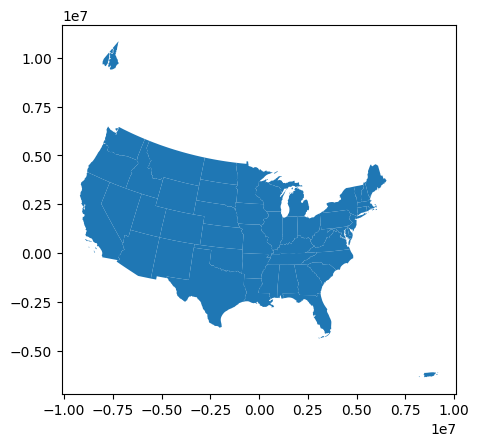

In [9]:
usa_shp.plot()

In [28]:
usa_shp['NAME'].unique()

array(['Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Alaska', 'Montana', 'Minnesota',
       'Nebraska', 'Washington', 'Ohio', 'Illinois', 'Missouri', 'Iowa',
       'South Dakota', 'Arkansas', 'Mississippi', 'Colorado',
       'North Carolina', 'Utah', 'Oklahoma', 'Wyoming', 'West Virginia',
       'Indiana', 'Massachusetts', 'Nevada', 'Connecticut',
       'District of Columbia', 'Rhode Island', 'Alabama', 'Puerto Rico',
       'South Carolina', 'Maine', 'Hawaii', 'Arizona', 'New Mexico',
       'Maryland', 'Delaware', 'Pennsylvania', 'Kansas', 'Vermont',
       'New Jersey', 'North Dakota', 'New Hampshire'], dtype=object)

In [29]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

usa_shp['State Abbrev'] = usa_shp['NAME'].map(us_state_abbrev)


In [30]:
usa_shp.head()

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI


In [31]:
merged_customre_rev = usa_shp.merge(cust_rev, left_on='State Abbrev', right_on='State', how='outer')
print(merged_customre_rev.head())

   FID   NAME  Obesity    SHAPE_Leng    SHAPE_Area  \
0  1.0  Texas     32.4  1.540832e+07  7.672329e+12   
1  1.0  Texas     32.4  1.540832e+07  7.672329e+12   
2  1.0  Texas     32.4  1.540832e+07  7.672329e+12   
3  1.0  Texas     32.4  1.540832e+07  7.672329e+12   
4  1.0  Texas     32.4  1.540832e+07  7.672329e+12   

                                            geometry State Abbrev  \
0  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
1  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
2  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
3  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   
4  POLYGON ((-4733454.413 -1236806.965, -4731845....           TX   

  Date received                  Sub-product  \
0    07/29/2013             Checking account   
1    07/29/2013  (CD) Certificate of deposit   
2    07/31/2013             Checking account   
3    07/22/2013             Checking account   
4    07/24/2013     

In [32]:
cust_rev.describe(include='all')

,Date received,Sub-product,Issue,Consumer complaint narrative,Company public response,Company,State
count,84811,84811,84811,13860,22991,84811,83262
unique,1864,5,5,13831,10,451,62
top,08/12/2015,Checking account,"Account opening, closing, or management","On at least XXXX previous occasions, I request...",Company has responded to the consumer and the ...,Bank of America,CA
freq,162,58197,37349,5,13042,13679,11936


In [33]:
merged_customre_rev['Sentiment'] = merged_customre_rev['Consumer complaint narrative'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [34]:
merged_customre_rev['Date received'] = pd.to_datetime(merged_customre_rev['Date received'])
merged_customre_rev['Year'] = merged_customre_rev['Date received'].dt.year
merged_customre_rev['Month'] = merged_customre_rev['Date received'].dt.month

## Heat Map

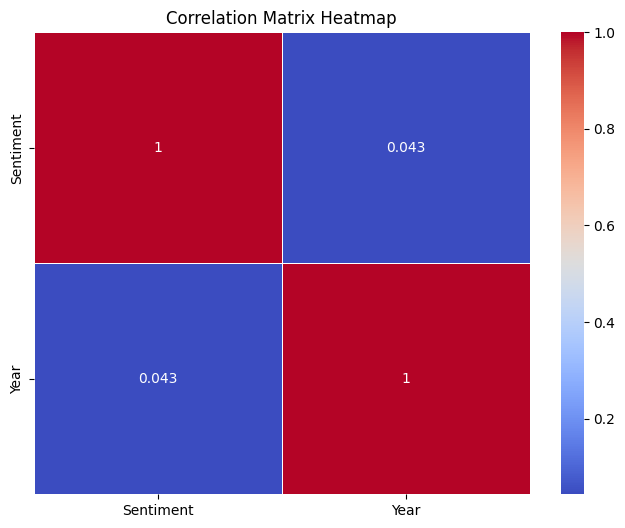

In [35]:
numeric_cols = ['Sentiment', 'Year']
corr_matrix = merged_customre_rev[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

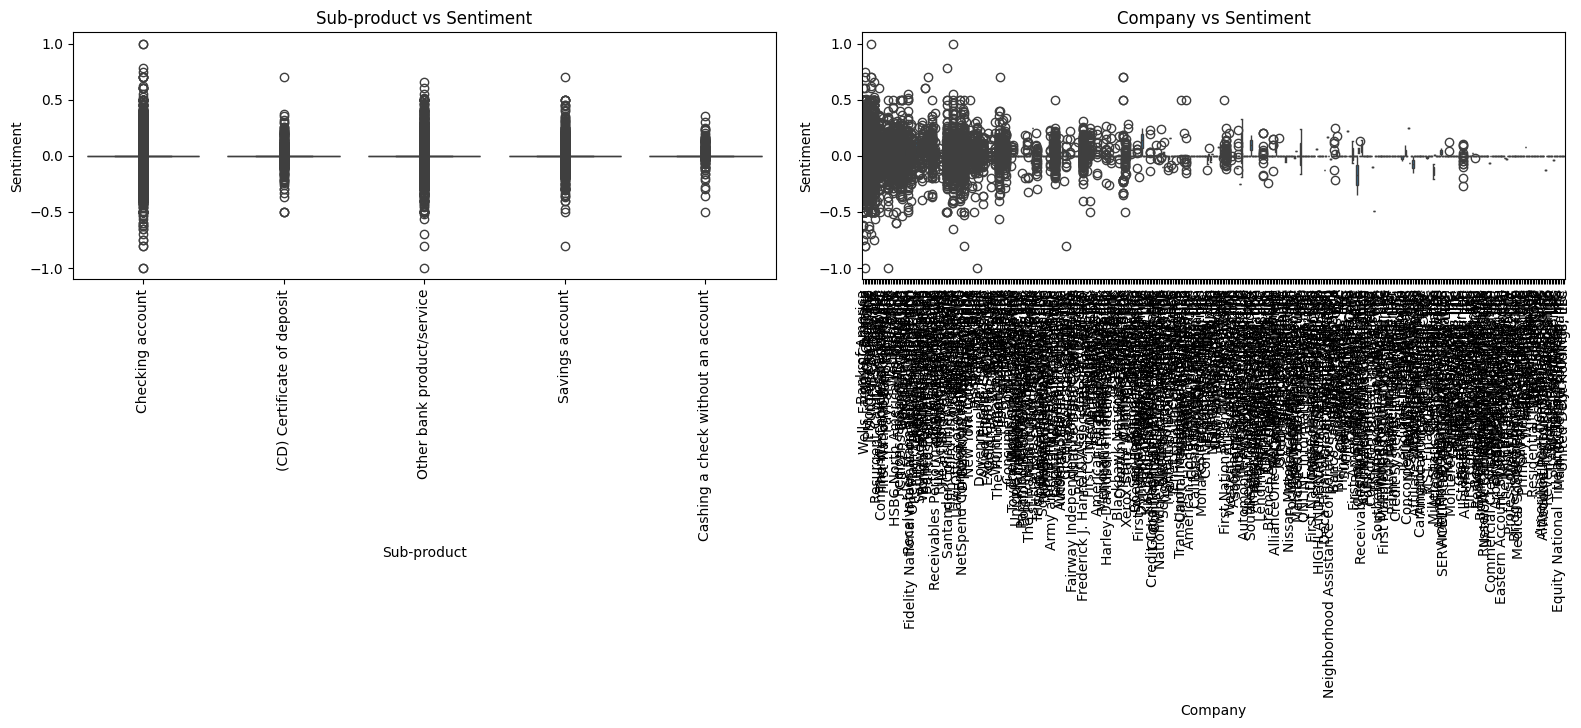

In [36]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Sub-product', y='Sentiment', data=merged_customre_rev)
plt.xticks(rotation=90)
plt.title('Sub-product vs Sentiment')


plt.subplot(2, 2, 2)
sns.boxplot(x='Company', y='Sentiment', data=merged_customre_rev)
plt.xticks(rotation=90)
plt.title('Company vs Sentiment')

plt.tight_layout()
plt.show()

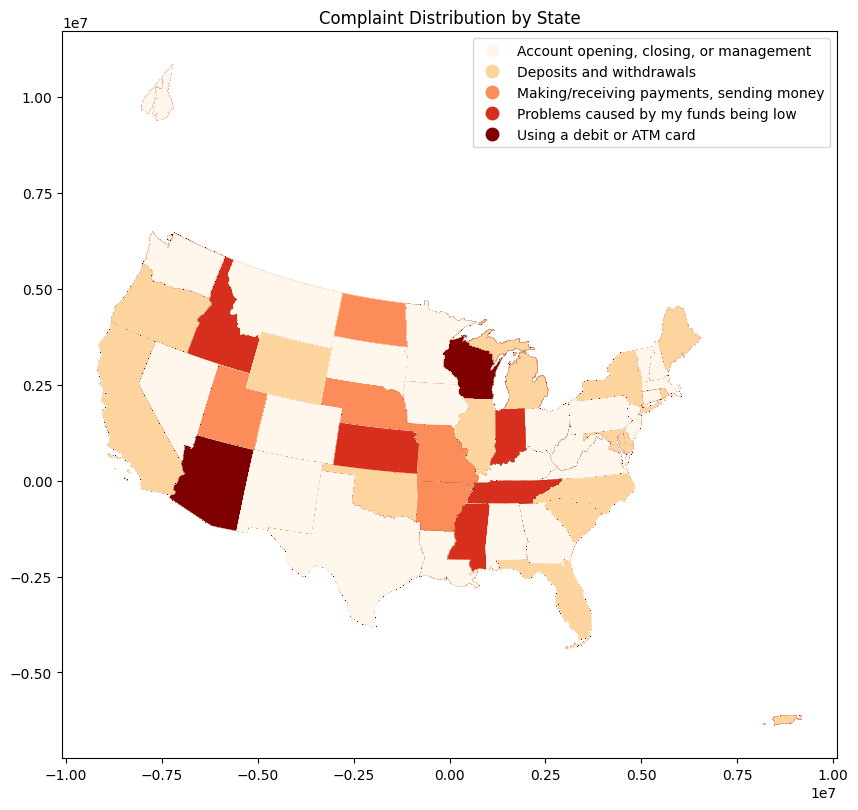

In [37]:
merged_customre_rev.plot(column='Issue', legend=True, figsize=(10, 10), cmap='OrRd')
plt.title('Complaint Distribution by State')
plt.show()

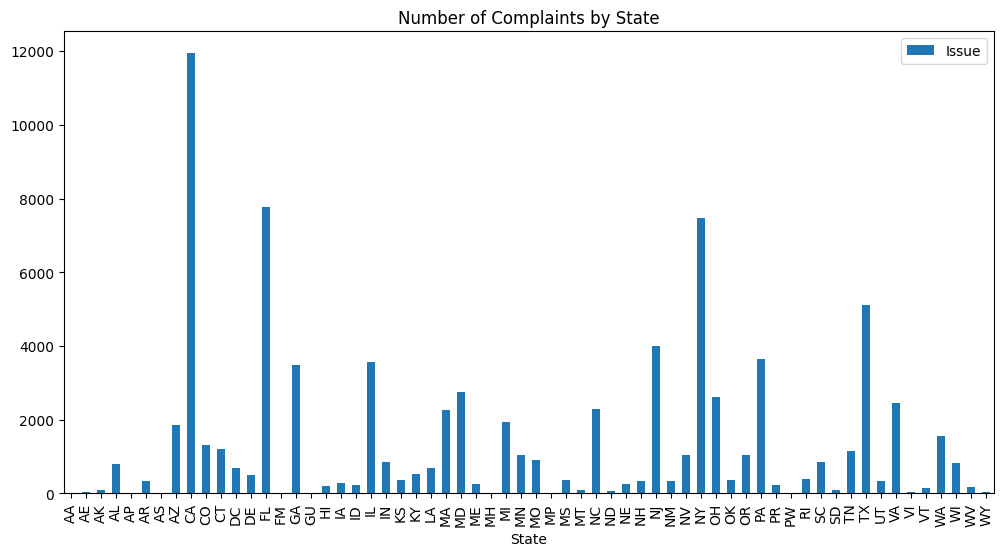

In [38]:
state_complaints = merged_customre_rev.groupby('State')['Issue'].count().reset_index()
state_complaints.plot(kind='bar', x='State', y='Issue', figsize=(12, 6), title='Number of Complaints by State')
plt.show()

In [ ]:
complaints_by_year = merged_customre_rev.groupby(['State', 'Year'])['Issue'].count().reset_index()

# Interactive plot using Plotly
fig = px.line(
    complaints_by_year,
    x='Year',
    y='Issue',
    color='State',
    title='Interactive Time-Based Analysis: Complaints per State by Year',
    labels={'Issue': 'Number of Complaints'},
    hover_data=['State']
)

# Customize hover data and legend
fig.update_traces(mode='lines+markers', hovertemplate='State: %{hover_data[0]}<br>Complaints: %{y}<br>Year: %{x}')
fig.update_layout(legend_title_text='State')

# Show the interactive plot
fig.show()

In [ ]:
complaint_counts = merged_customre_rev.groupby('NAME')['Issue'].count().reset_index(name='Complaint Count')

# Merge complaint counts back to the original GeoDataFrame
merged_customre_rev = merged_customre_rev.merge(complaint_counts, left_on='NAME', right_on='NAME', how='left')

# Calculate centroids only for valid geometries
merged_customre_rev['centroid'] = merged_customre_rev.geometry.centroid

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plot the state geometries with color based on complaint counts
merged_customre_rev.plot(ax=ax, column='Complaint Count', cmap='YlOrRd', edgecolor='black', linewidth=0.5,
                          legend=True, legend_kwds={'label': "Number of Complaints", 'orientation': "horizontal"})

# Highlight the state with the highest and lowest complaint counts
highest_state = merged_customre_rev.loc[merged_customre_rev['Complaint Count'].idxmax()]
lowest_state = merged_customre_rev.loc[merged_customre_rev['Complaint Count'].idxmin()]

# Add highest count state
merged_customre_rev[merged_customre_rev['NAME'] == highest_state['NAME']].plot(ax=ax, color='blue', edgecolor='black', linewidth=2, label='Highest Complaints')

# Add lowest count state
merged_customre_rev[merged_customre_rev['NAME'] == lowest_state['NAME']].plot(ax=ax, color='red', edgecolor='black', linewidth=2, label='Lowest Complaints')

# Add title and legend
ax.set_title('Complaint Counts by State with Centroids', fontsize=16)
ax.legend()

# Add markers for centroids, checking for None
for idx, row in merged_customre_rev.iterrows():
    if row['centroid'] is not None:  # Check if centroid is valid
        ax.text(row['centroid'].x, row['centroid'].y, str(row['Complaint Count']), fontsize=8, ha='center', va='center')

plt.show()

<ipython-input-43-61da165d6963>:19: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  merged_customre_rev[merged_customre_rev['NAME'] == lowest_state['NAME']].plot(ax=ax, color='red', edgecolor='black', linewidth=2, label='Lowest Complaints')
<ipython-input-43-61da165d6963>:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


AttributeError: 'NoneType' object has no attribute 'x'